
keywords: numpy, scikit-learn, logistic regression, descente de gradient, optimisation.

# Detect hand-written digits with logistic regression and explore gradient descent

## Description

Mr Pontier is back and needs your help. This times, he needs to automatically detect hand-written digits written on pictures that represents the phone numbers of his clients and collaborators.
Because he has thousands of documents, this will take far too long to do it manually. This is why he asked you if you can design an algorithm that automatically detect the number from the pictures.

Furthermore, Mr Pontier wants
* to understand how the algorithm works,
* to compare the performance with several classification algorithms 
* to observe the convergence of a grandient descent algorithm for further investigation.


## Proposed Plan

**1) Get and understand your data**

git clone the repository and run the given notebook in https://github.com/dtrckd/simplon_datai_2020.


In [1]:
# Import some libraries
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 

# Import some data
digits = load_digits()

# Show dimensionality
print(digits.data.shape)

(1797, 64)


In [2]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

### What is the type of the data ?

digits is an array of 1797 images or data instance

### How many pixel has one data instance ?

1 data instance or image has 64 pixels (columns of the array)

### What is the type of data of one pixel ? what does it represents ?

1 pixel is an integer in the range 0..16 which represents the grey level => This reduces dimensionality and gives invariance to small distortions.

<Figure size 432x288 with 0 Axes>

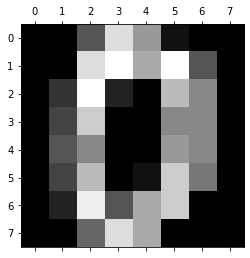

In [4]:
# Show one data
plt.gray()
plt.matshow(digits.images[0])
plt.show()

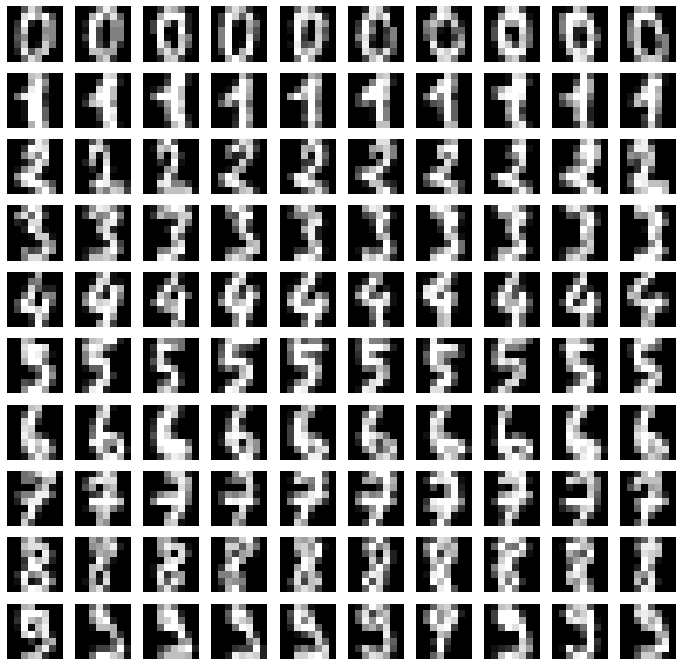

In [5]:
# Show several data for each label (== category) 

X = digits.images
Y = digits.target

n_digits = np.unique(Y)
M = 10
dim = int(np.sqrt(X.shape[1]))

fig, axs = plt.subplots(len(n_digits), M, figsize=(12, 12))

for i, d in enumerate(n_digits):
    for j in range(M):
        axs[i,j].imshow(X[Y == d][j])
        axs[i,j].axis('off')

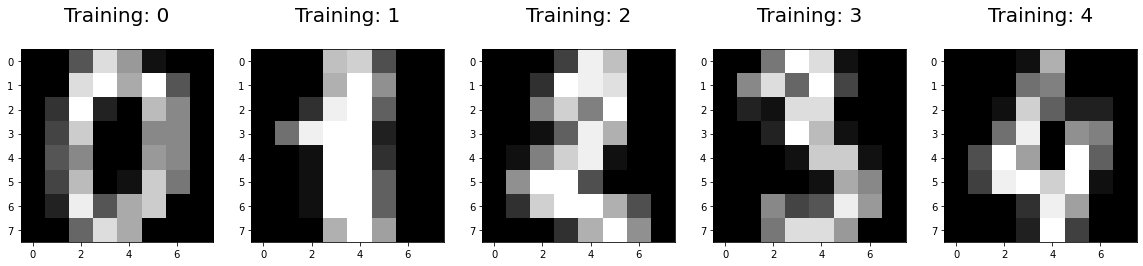

In [6]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

In [7]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Images Data Shape" , digits.data.shape)

Images Data Shape (1797, 64)


In [8]:
# Print to show there are 1797 labels (integers from 0–9)
print("Labels Data Shape", digits.target.shape)

Labels Data Shape (1797,)


In [9]:
print(list(digits.target))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 

**2) Prepare your ML algorithm**

> Veille
How to evaluate classification algorithms ?
* https://scikit-learn.org
* wikipedia
* towards data science
* ...

> Questions
* Write the equation of the **precision** and **recall** score and explicit what each terms represents.

Let us call the class corresponding to a fire "positive" and the other "negative". If we predict a fire when there is one, we are making a "positive" prediction which is correct, it is a True Positive TP. If on the other hand this prediction is incorrect, it is a False Positive FP. And so on. False Positives FP are also sometimes referred to as "type I error", and False Negatives "type II error".

TN = True Negatives; TP = True Positives; FN = False Negatives; FP = False Positives

The "recall", or "sensitivity", is the rate of True Positives TP, that is to say the proportion of positives that have been correctly identified. This is the ability of our model to detect all fires.

### RECALL = TP / (TP + FN)

We can easily have a very good recall ... By systematically predicting "positive". We will not miss any fire, but our model is not useful.

We will therefore also be interested in precision, that is to say the proportion of correct predictions among the points that have been predicted to be positive. This is the ability of our model to trigger an alarm only for a real fire.

### PRECISION = TP / (TP + FP)

* explain the purpose of the training set ?

A training dataset is a dataset of examples used during the learning process and is used to fit the parameters (e.g., weights) of, for example, a classifier.

* explain the purpose of the testing set ?

A test dataset is a dataset that is independent of the training dataset, but that follows the same probability distribution as the training dataset. If a model fit to the training dataset also fits the test dataset well, minimal overfitting has taken place. A better fitting of the training dataset as opposed to the test dataset usually points to overfitting.

A test set is therefore a set of examples used only to assess the performance (i.e. generalization) of a fully specified classifier.

<!--* the randomization of the data ?-->

The basic benefits of randomization are as follows:
it eliminates the selection bias, balances the groups with respect to many known and unknown confounding or pronostic variables, and forms the basis for statistical tests, a basis for an assumption of free statistical test of the equality of treatments.

What does the `train_test_split` function in sklearn do ?

The `train_test_split` function is a quick utility that wraps input validation and next(ShuffleSplit().split(X, y)) and application to input data into a single call for splitting (and optionally subsampling) data in a oneliner. Allowed inputs are lists, numpy arrays, scipy-sparse matrices or pandas dataframes.

use the `train_test_split` function of sklearn to build a test set with size that represents 20% of the original dataset (and 80% for the training set).

check that the ratio is correct.

In [10]:
from sklearn.model_selection import train_test_split

# Test set with size that represents 20% of the original dataset and 80% for the training set
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)
ratio_train = x_train.shape[0]/digits.data.shape[0] # Total train raws / Total data raws
ratio_test = x_test.shape[0]/digits.data.shape[0] # Total test raws / Total data raws
print('Ratio TRAIN data set : {0:0.2f}'.format(ratio_train))
print('Ratio TEST data set : {0:0.2f}'.format(ratio_test))

Ratio TRAIN data set : 0.80
Ratio TEST data set : 0.20


**3) Predict Digits**

In the dataset we have multiple labels. Therefore, to start we will predict in a binary case. It means that we will predict only if an image is a given digit (for exemple `7`) or not.

To do so, we will apply a **logistic regression** algorithm plus (at least) **two** others of your choices. 

Fit the model and show the performance results whithin a table for each models in terms of:
* the **precision** score on the testing set 
* the **recall** score on the testing set
* the **inference time** for each algorithm

How many input data the algorithms needs to be efficient (and why) ? 

Compare the performance on the training set. What do you observe ?

In [ ]:
from sklearn.preprocessing import StandardScaler

x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

# targets modification for testing only "7" digit
y_train[ y_train != 7] = 0
y_train[ y_train == 7] = 1
list(y_train)
y_test[ y_test != 7] = 0
y_test[ y_test == 7] = 1
list(y_test)

In [12]:
# Make an instance of the Model
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=1000)

In [13]:
# Training the model on the data, storing the information learned from the data
LR.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = LR.predict(x_test)
list(y_pred)

In [15]:
# Use score method to get accuracy of model
# Accuracy = (TP + TN)/(TP + TN + FP + FN)
# where TP = True positive; FP = False positive; TN = True negative; FN = False negative
score = LR.score(x_test, y_test)
print('ACCURACY of the model : {0:0.2f}'.format(score))

ACCURACY of the model : 0.99


In [16]:
LR.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [17]:
from sklearn import svm
from sklearn.metrics import average_precision_score

# Create a simple classifier
classifier = svm.LinearSVC(max_iter=2000)
classifier.fit(x_train, y_train)
y_score = classifier.decision_function(x_test)

# AP = sum_n (Recall_n - Recall_{n-1}) Precision_n
average_precision = average_precision_score(y_test, y_score)

print('AVERAGE PRECISION score : {0:0.2f}'.format(average_precision))

AVERAGE PRECISION score : 0.98


Text(0.5, 1.0, 'Precision-Recall curve: AP=0.98')

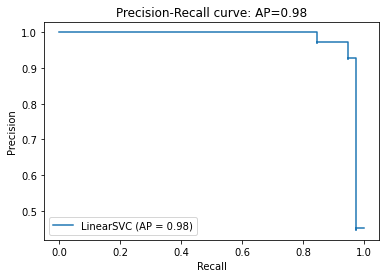

In [18]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(classifier, x_test, y_test)
disp.ax_.set_title('Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

**4) Multi-class classification**

Fit now the algorithm in the multiclass case (ie using all the the classes (target)).

Show the result with
* the confusion matrix (see sklearn.metrics.plot_confusion_matrix)
* the classification report (see sklearn.metrics.classification_report)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[319   2]
 [  2  37]]


You can get more information on the accuracy of the model with a confusion matrix. In the case of binary classification, the confusion matrix shows the numbers of the following:

* True Negatives in the upper-left position TN = 319
* False Negatives in the lower-left position FN = 2
* False Positives in the upper-right position FP = 2
* True Positives in the lower-right position TP = 37

RECALL = TP / (TP + FN) = 37 / (37 + 2) = 0,9487

PRECISION = TP / (TP + FP) = 37 / (37 + 2) = 0,9487